## Recurrent Neural Networks - Keras

In [1]:
import tensorflow as tf
tf.keras.__version__

/home/martin/anaconda3/envs/dlf/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.0.8-tf'

In [2]:
#from keras.layers import SimpleRNN

Simple RNN processes batched of sequences. It takes inputs of shape (batch_size, timesteps, input_features).
- It can be return full sequences of outputs 3D tensor (batch_size, timesteps, input_features).
- Or it can return only the last output for each input sequence.

In [18]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import SimpleRNN
from tensorflow.python.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Stack recurrent layers

In [20]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # last layer only returs the last output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB movie review

In [21]:
from tensorflow.python.keras.datasets import imdb

In [22]:
# number of words to consider as features
max_features = 10000
maxlen = 500
batch_size = 32

print("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

loading data ...
25000 train sequences
25000 test sequences


In [38]:
len(input_train[0])

500

In [25]:
input_train.shape

(25000,)

In [26]:
input_train[0][:5]

[1, 14, 22, 16, 43]

In [28]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [29]:
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

#(batch_size, timesteps, input_features)
print("input_train shape", input_train.shape)

Pad sequences (samples x time)
input_train shape (25000, 500)


In [30]:
input_train[0][:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [31]:
input_train[0][282:287]

array([ 1, 14, 22, 16, 43], dtype=int32)

In [32]:
input_train[0][500-len_t1:287]

array([ 1, 14, 22, 16, 43], dtype=int32)

let's train the network

In [35]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation=tf.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#from tf.train import 

In [37]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s - loss: 0.6876 - acc: 0.5423 - val_loss: 0.6683 - val_acc: 0.5900
Epoch 2/10
20000/20000 [==============================] - 18s - loss: 0.6393 - acc: 0.6292 - val_loss: 0.6323 - val_acc: 0.6324
Epoch 3/10
20000/20000 [==============================] - 18s - loss: 0.5765 - acc: 0.6982 - val_loss: 0.6303 - val_acc: 0.6438
Epoch 4/10
20000/20000 [==============================] - 18s - loss: 0.5288 - acc: 0.7402 - val_loss: 0.5093 - val_acc: 0.7552
Epoch 5/10
20000/20000 [==============================] - 18s - loss: 0.4970 - acc: 0.7645 - val_loss: 0.5293 - val_acc: 0.7432
Epoch 6/10
20000/20000 [==============================] - 18s - loss: 0.4634 - acc: 0.7866 - val_loss: 0.5206 - val_acc: 0.7472
Epoch 7/10
20000/20000 [==============================] - 18s - loss: 0.4391 - acc: 0.8018 - val_loss: 0.5243 - val_acc: 0.7612
Epoch 8/10
20000/20000 [==============================]

let's display the training and validation loss and accuracy

In [43]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

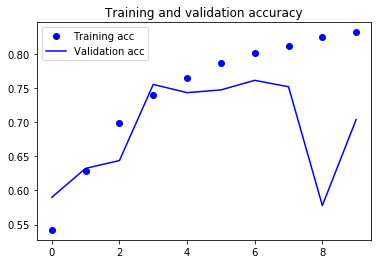

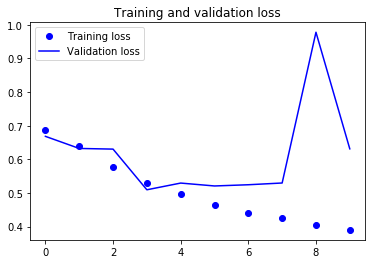

In [46]:
import matplotlib.pyplot as plt

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM model

In [49]:
from tensorflow.python.keras.layers import LSTM

In [50]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 61s - loss: 0.6763 - acc: 0.5663 - val_loss: 0.6041 - val_acc: 0.6826
Epoch 2/10
20000/20000 [==============================] - 61s - loss: 0.5908 - acc: 0.6857 - val_loss: 0.6396 - val_acc: 0.6384
Epoch 3/10
20000/20000 [==============================] - 61s - loss: 0.4974 - acc: 0.7616 - val_loss: 0.4662 - val_acc: 0.7834
Epoch 4/10
20000/20000 [==============================] - 61s - loss: 0.4387 - acc: 0.8005 - val_loss: 0.4347 - val_acc: 0.7944
Epoch 5/10
20000/20000 [==============================] - 61s - loss: 0.3902 - acc: 0.8315 - val_loss: 0.3427 - val_acc: 0.8582
Epoch 6/10
20000/20000 [==============================] - 63s - loss: 0.3478 - acc: 0.8529 - val_loss: 0.3928 - val_acc: 0.8242
Epoch 7/10
20000/20000 [==============================] - 63s - loss: 0.3245 - acc: 0.8657 - val_loss: 0.5752 - val_acc: 0.7712
Epoch 8/10
20000/20000 [==============================]